<a href="https://colab.research.google.com/github/shylesharepelly/LGMVIP--DataScience/blob/main/Iris_flowers_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Algorithm used: Support Vector Machine

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
datalink = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(datalink)
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [ ]:
data.tail()

,5.1,3.5,1.4,0.2,Iris-setosa
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
data.head()

,sepal length,sepal width,petal length,petal width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [ ]:
data.shape

(149, 5)

In [ ]:
data.describe()

,sepal length,sepal width,petal length,petal width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.max()

sepal length               7.9
sepal width                4.4
petal length               6.9
petal width                2.5
class           Iris-virginica
dtype: object

In [ ]:
data.min()

sepal length            4.3
sepal width             2.0
petal length            1.0
petal width             0.1
class           Iris-setosa
dtype: object

In [ ]:
data.isnull()

,sepal length,sepal width,petal length,petal width,class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
144,False,False,False,False,False
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False


In [ ]:
data.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

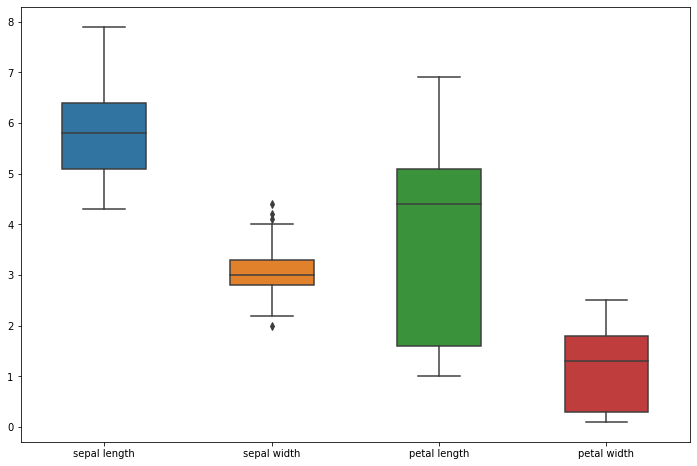

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data, width = 0.5, fliersize=5)
plt.show()

In [ ]:
correlation=data.corr()
correlation

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.103784,0.871283,0.816971
sepal width,-0.103784,1.000000,-0.415218,-0.350733
petal length,0.871283,-0.415218,1.000000,0.962314
petal width,0.816971,-0.350733,0.962314,1.000000


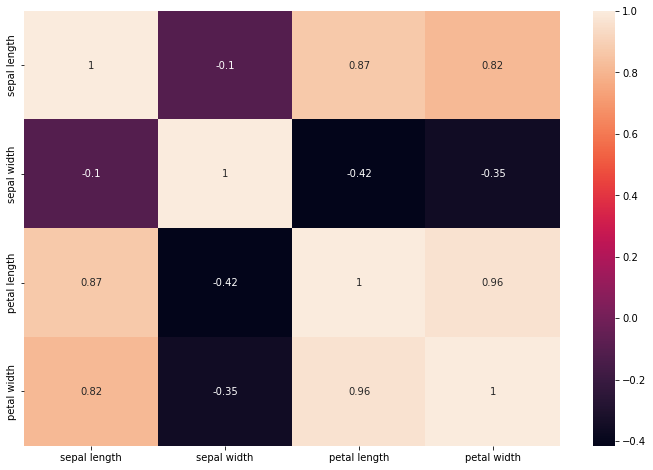

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(correlation, annot = True)
plt.show()

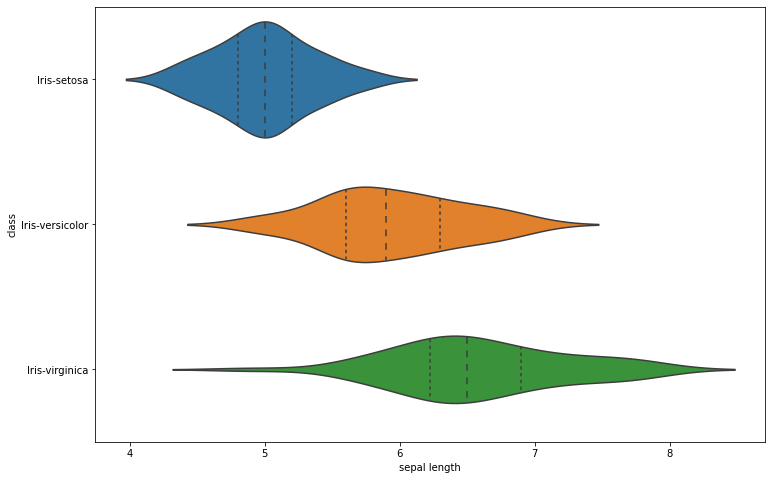

In [ ]:
plt.figure(figsize = (12,8))
sns.violinplot(y='class', x='sepal length',data = data, inner = 'quartile')
plt.show()

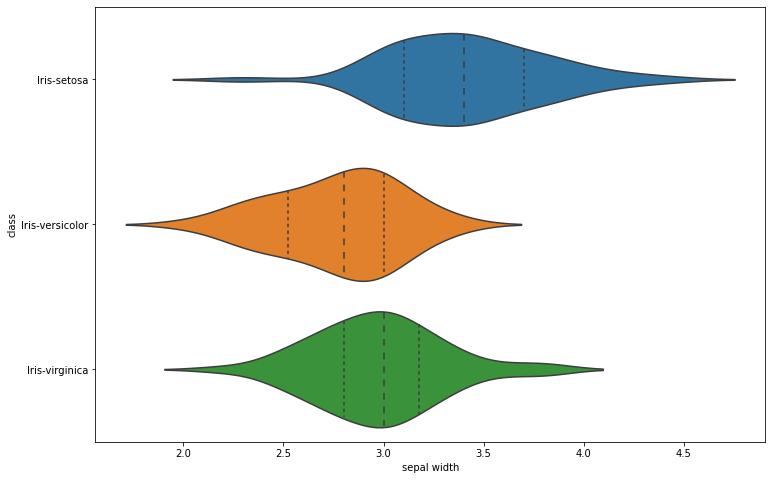

In [ ]:
plt.figure(figsize = (12,8))
sns.violinplot(y='class', x='sepal width',data = data, inner = 'quartile')
plt.show()

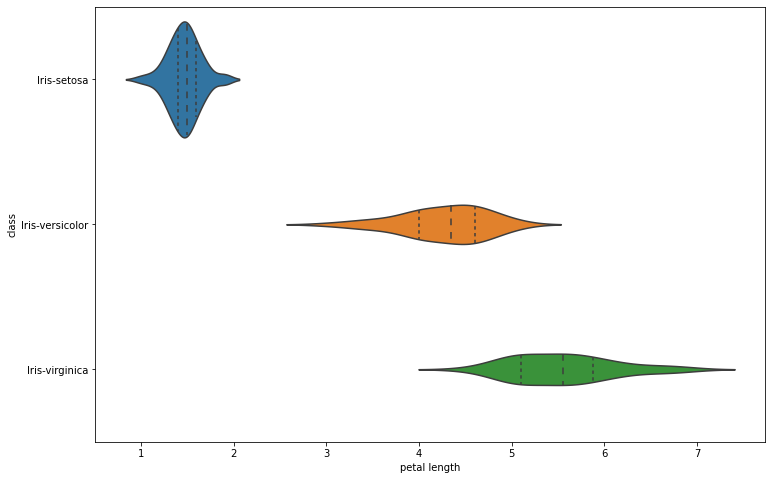

In [ ]:
plt.figure(figsize = (12,8))
sns.violinplot(y='class', x='petal length',data = data, inner = 'quartile')
plt.show()

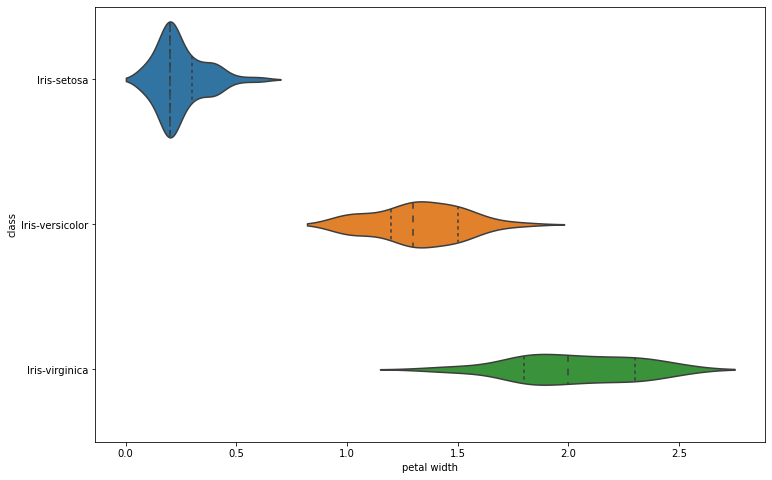

In [ ]:
plt.figure(figsize = (12,8))
sns.violinplot(y='class', x='petal width',data = data, inner = 'quartile')
plt.show()

Training and testing model

In [ ]:
data.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [ ]:
X=data.drop(['class'], axis =1)
Y=data['class']

In [ ]:
X

,sepal length,sepal width,petal length,petal width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4
...,...,...,...,...
144,6.7,3.0,5.2,2.3
145,6.3,2.5,5.0,1.9
146,6.5,3.0,5.2,2.0
147,6.2,3.4,5.4,2.3


In [ ]:
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
144    Iris-virginica
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
Name: class, Length: 149, dtype: object

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=50)

In [ ]:
print('shape of X and Y  train :', X_train.shape, Y_train.shape)
print('shape of X and Y  test :', X_test.shape, Y_test.shape)

shape of X and Y  train : (111, 4) (111,)
shape of X and Y  test : (38, 4) (38,)


In [ ]:
svcmodel = SVC()
svcmodel.fit(X_train, Y_train)

SVC()

In [ ]:
predict_values = svcmodel.predict(X_test)
predict_values

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa'], dtype=object)

In [ ]:
accuracy_score(Y_test, predict_values)

0.9736842105263158

In [ ]:
print("Accuracy of svm model:",accuracy_score(Y_test, predict_values))

Accuracy of svm model: 0.9736842105263158


Conclusion

So, from this model we are getting the accuracy of approximately 97%.As this is the highest level of accuracy.So, this model can be accepted.